In [2]:
import pandas as pd

# Load the dataset
matches = pd.read_csv('WorldCupMatches.csv')
teams = pd.read_csv('WorldCups.csv')

# Display the first few rows of the dataset
print(matches.head())
print(teams.head())


     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0

In [9]:
# Handle missing values
matches.fillna(method='ffill', inplace=True)



# Select relevant columns for analysis
matches = matches[['Year', 'Datetime', 'Stage', 'Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials']]

# Display the cleaned dataset
print(matches.head())


     Year              Datetime    Stage Home Team Name  Home Team Goals  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         France              4.0   
1  1930.0  13 Jul 1930 - 15:00   Group 4            USA              3.0   
2  1930.0  14 Jul 1930 - 12:45   Group 2     Yugoslavia              2.0   
3  1930.0  14 Jul 1930 - 14:50   Group 3        Romania              3.0   
4  1930.0  15 Jul 1930 - 16:00   Group 1      Argentina              1.0   

   Away Team Goals Away Team Name Win conditions  Attendance  \
0              1.0         Mexico                     4444.0   
1              0.0        Belgium                    18346.0   
2              1.0         Brazil                    24059.0   
3              1.0           Peru                     2549.0   
4              0.0         France                    23409.0   

   Half-time Home Goals  Half-time Away Goals                 Referee  \
0                   3.0                   0.0  LOMBARDI Domingo (URU)   
1           

C:\Users\admin\AppData\Local\Temp\ipykernel_7904\3632552488.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  matches.fillna(method='ffill', inplace=True)


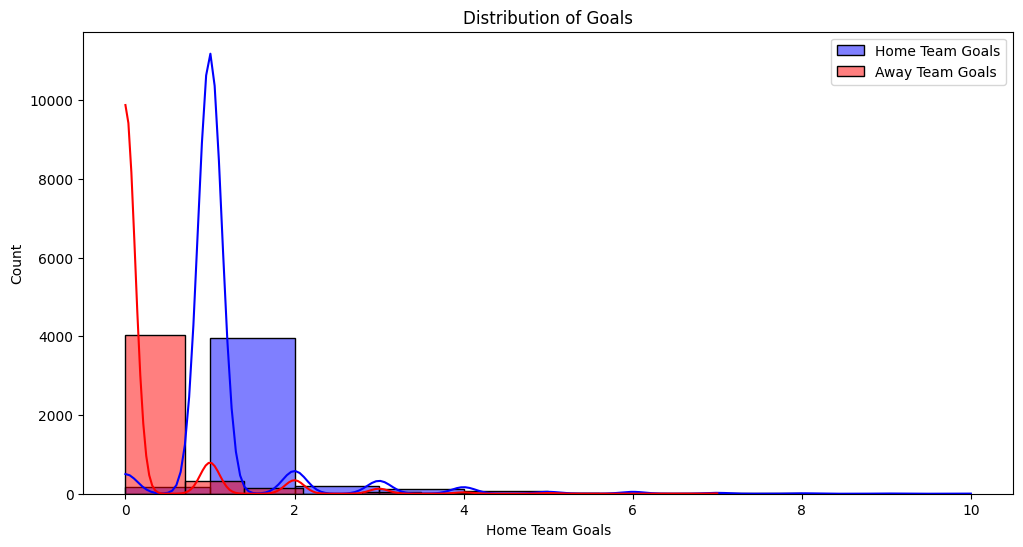

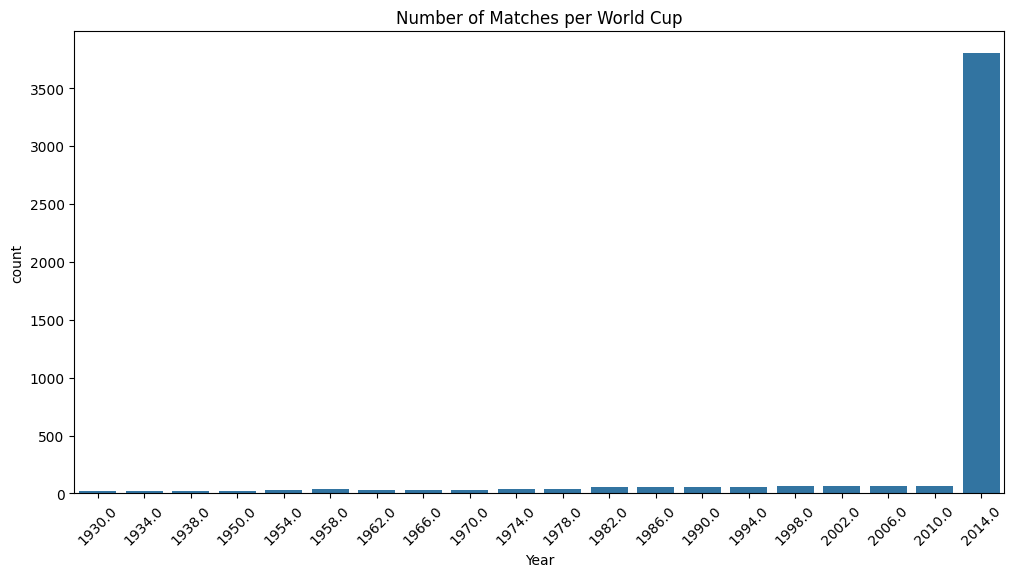

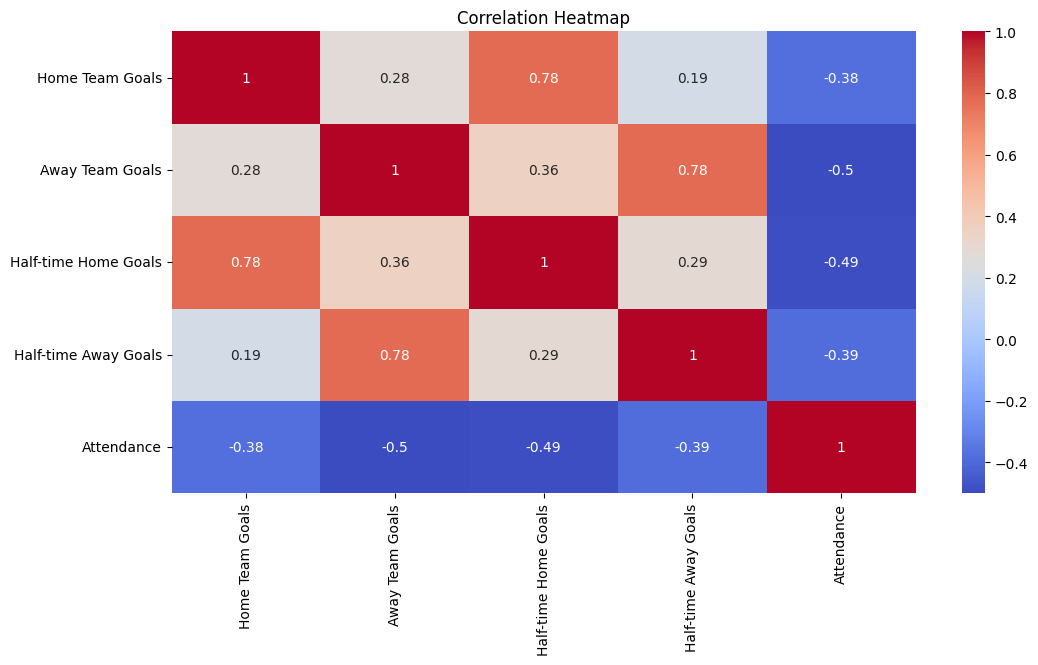

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of goals
plt.figure(figsize=(12, 6))
sns.histplot(matches['Home Team Goals'], bins=10, kde=True, color='blue', label='Home Team Goals')
sns.histplot(matches['Away Team Goals'], bins=10, kde=True, color='red', label='Away Team Goals')
plt.title('Distribution of Goals')
plt.legend()
plt.show()

# Number of matches per World Cup
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=matches)
plt.title('Number of Matches per World Cup')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
corr = matches[['Home Team Goals', 'Away Team Goals', 'Half-time Home Goals', 'Half-time Away Goals', 'Attendance']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [11]:
# Feature: goal difference
matches['Goal Difference'] = matches['Home Team Goals'] - matches['Away Team Goals']

# Feature: match outcome
def get_outcome(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return 'Home Win'
    elif row['Home Team Goals'] < row['Away Team Goals']:
        return 'Away Win'
    else:
        return 'Draw'

matches['Outcome'] = matches.apply(get_outcome, axis=1)

# Display the dataset with new features
print(matches.head())


     Year              Datetime    Stage Home Team Name  Home Team Goals  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         France              4.0   
1  1930.0  13 Jul 1930 - 15:00   Group 4            USA              3.0   
2  1930.0  14 Jul 1930 - 12:45   Group 2     Yugoslavia              2.0   
3  1930.0  14 Jul 1930 - 14:50   Group 3        Romania              3.0   
4  1930.0  15 Jul 1930 - 16:00   Group 1      Argentina              1.0   

   Away Team Goals Away Team Name Win conditions  Attendance  \
0              1.0         Mexico                     4444.0   
1              0.0        Belgium                    18346.0   
2              1.0         Brazil                    24059.0   
3              1.0           Peru                     2549.0   
4              0.0         France                    23409.0   

   Half-time Home Goals  Half-time Away Goals                 Referee  \
0                   3.0                   0.0  LOMBARDI Domingo (URU)   
1           

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare data for modeling
features = ['Home Team Goals', 'Away Team Goals', 'Half-time Home Goals', 'Half-time Away Goals', 'Goal Difference']
X = matches[features]
y = matches['Outcome']

# Encode the target variable
y = y.map({'Home Win': 1, 'Away Win': 2, 'Draw': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')


Accuracy: 1.0
Confusion Matrix:
[[ 34   0   0]
 [  0 842   0]
 [  0   0  39]]


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       842
           2       1.00      1.00      1.00        39

    accuracy                           1.00       915
   macro avg       1.00      1.00      1.00       915
weighted avg       1.00      1.00      1.00       915

